<a href="https://colab.research.google.com/github/shauryanegi/TensorFlow-Tutorials/blob/master/01_neural_network_regression_in_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem in our case, we're going to simplify it: predicting a numerical variable based on some combination of variables, even shorter....predicting a number.

In [3]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.5.0


## Creating a data to view and fit

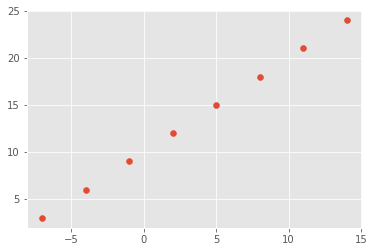

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.style.use("ggplot")
plt.scatter(X, y)


In [5]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and output shapes

In [6]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])

house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [7]:
X[0], y[0]

(-7.0, 3.0)

In [8]:
X[1], y[1]

(-4.0, 6.0)

In [9]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [10]:
X[0], y[0]

(-7.0, 3.0)

In [11]:
#Turn our NumPy arrays into tensors
X = tf.cast(tf.constant(X), dtype = tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [12]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

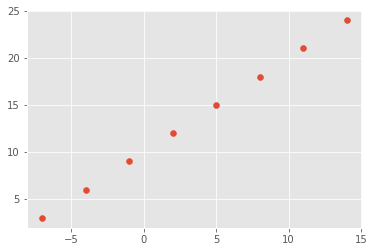

In [13]:
plt.scatter(X,y)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of the deep learning model.

2. **Compiling a model** - Define the loss function (in other words, the function which tells our how model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).

3. Fitting the model - letting the model try to find patterns between X and y (features and labels)

In [14]:
# Set random seed

tf.random.set_seed(42)

# 1. Create a model using the Sequential API

model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(1))

# 2. Compile the model

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(), metrics=['mae'])  # mean absolute error

   # Stochastic Gradient Descent.

# 3. Fit the model

model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 284ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 10.9748 - mae: 10.9748


In [15]:
# Check out X and y
X , y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [16]:
# Try to make a prediction using our model
y_pred = model.predict([17.0])

In [17]:
y_pred , y_pred + 11

(array([[12.716021]], dtype=float32), array([[23.71602]], dtype=float32))

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - We might add more layers, increase the number of hidden units (also called neurons) within each of the hidden layers, called the activation function of each layer.

2. **Compiling a model** - We might change the optimization function or perhaps the **learning rate** of optimization function.

3. **Fitting a model** - Here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from)

In [18]:
## Increasing the number of epochs

# Set random seed

tf.random.set_seed(42)

# 1. Create a model using the Sequential API

model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(1))

# 2. Compile the model

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(), metrics=['mae'])  # mean absolute error

   # Stochastic Gradient Descent.

# 3. Fit the model

model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 237ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================] - 0s 6m

In [19]:
# Try to make a prediction using our model
y_pred = model.predict([17.0])

In [20]:
y_pred #much better than before

array([[30.158512]], dtype=float32)

In [21]:
# Let us try more things now to improve the model

# 1. Create a model with Sequential API

model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(100, activation = 'relu'))

model.add(tf.keras.layers.Dense(1))

# 2. Compile our model

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=['mae'])

# 3. Compile the model

model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 327ms/step - loss: 13.9468 - mae: 13.9468
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 5.6308 - mae: 5.6308
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 8.5388 - mae: 8.5388
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 8.0333 - mae: 8.0333
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 5.1341 - mae: 5.1341
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 3.8633 - mae: 3.8633
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 5.7742 - mae: 5.7742
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 5.8511 - mae: 5.8511
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 4.4557 - mae: 4.4557
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 3.7069 - mae: 3.7069
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - loss: 4.5

In [22]:
# Try to make a prediction using our model

y_pred = model.predict([17.0]) 

In [23]:
y_pred ##The model is overfitting and therefore it is giving a poor result.

array([[28.32901]], dtype=float32)

### Evaluating a model 

A typical workflow you'll go through when building neural networks is:

Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...

The tweaking comes from maybe not building a model from scratch but adjusting an existing one.

When it comes to evaluation, you'll want to remember the words: "visualize, visualize, visualize."

This is because you're probably better looking at something (doing) than you are thinking about something.

It's a good idea to visualize:

**The data** - what data are you working with? What does it look like?

**The model itself** - what does the architecture look like? What are the different shapes?

**The training of a model** - how does a model perform while it learns?

**The predictions of a model** - how do the predictions of a model line up against the ground truth (the original labels)?

Let's start by visualizing the model.

But first, we'll create a little bit of a bigger dataset and a new model we can use (it'll be the same as before, but the more practice the better)

In [24]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [25]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

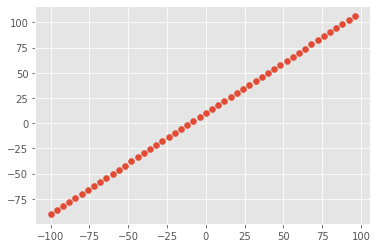

In [26]:
# Visualize the data
plt.scatter(X,y);

### The 3 sets...

Each set serves a specific purpose:

**Training set** - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).

**Validation set** - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).

**Test set** - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).

For now, we'll just use a training and test set, this means we'll have a dataset for our model to learn on as well as be evaluated on.

We can create them by splitting our X and y arrays.

🔑 Note: When dealing with real-world data, this step is typically done right at the start of a project (the test set should always be kept separate from all other data). We want our model to learn on training data and then evaluate it on test data to get an indication of how well it generalizes to unseen examples.

In [27]:
#Check the number of samples we have
len(X)

50

In [28]:
#Split the data into training and test sets

X_train = X[:40] #First 40 examples (80% of the data)
y_train = y[:40]

X_test = X[40:] # Last 10 Examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

## Visualizing the data

Now we've got our training and test data, it's a good idea to visualize it.

Let's plot it with some nice colours to differentiate what's what.

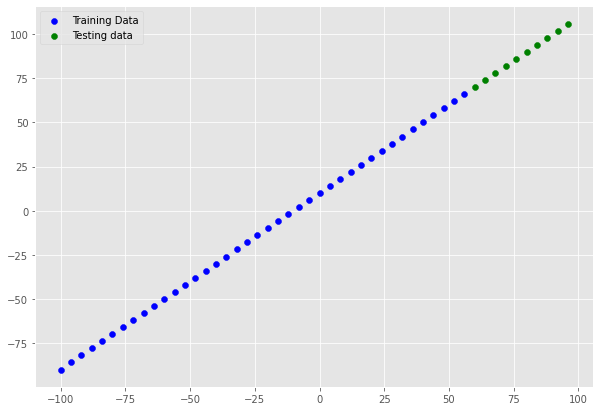

In [29]:
plt.figure(figsize = (10,7))

#Plot training data to blue
plt.scatter(X_train,y_train, c ='b', label = 'Training Data')

#Plot test data to green
plt.scatter(X_test,y_test, c='g', label = 'Testing data')
plt.legend();

In [30]:
#Let's have a look at how to build a neural network for our data

# 1. Create a model

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# 2. Compile a model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate= 0.01),
              metrics = ['mae'])

# 3. Fit the model
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 8.1530 - mae: 8.1530
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 7.8493 - mae: 7.8493
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 7.6240 - mae: 7.6240
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 7.5539 - mae: 7.5539
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 7.5999 - mae: 7.5999
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 7.7012 - mae: 7.7012
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 7.7001 - mae: 7.7001
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 7.6143 - mae: 7.6143
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 7.5518 - mae: 7.5518
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 7.5005 - mae: 7.5005
Epoch 11/100
2/2 [==============================] - 0s 3ms/step - loss: 7.4694 

## Visualizing the model

In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [32]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [33]:
# Let's create a model which builds automatically by defining the input_shape n the first layer

tf.random.set_seed(42)

# Create a model

model = tf.keras.Sequential(name= 'Model1')
(model.add(tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'
 )), )
model.add(tf.keras.layers.Dense(1, name='output_layer'))

# Compile a model

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

# Fit a model

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 24.7643 - mae: 24.7643
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 19.0262 - mae: 19.0262
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 13.5870 - mae: 13.5870
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 8.8757 - mae: 8.8757
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 8.6327 - mae: 8.6327
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 10.8266 - mae: 10.8266
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 11.7706 - mae: 11.7706
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 11.8001 - mae: 11.8001
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 11.1962 - mae: 11.1962
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 10.0506 - mae: 10.0506
Epoch 11/100
2/2 [==============================] - 0s 4ms/step

In [34]:
#Get a summary of our model
model.summary()

Model: "Model1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - Total number of parameters in the model
* Trainable parameters - These are the parameters (patterns) that model can update as it trains
* Non Trainable params - These parameters are not updated during training. (This is typical when you bring in already learn patterns from other models during transfer learning)

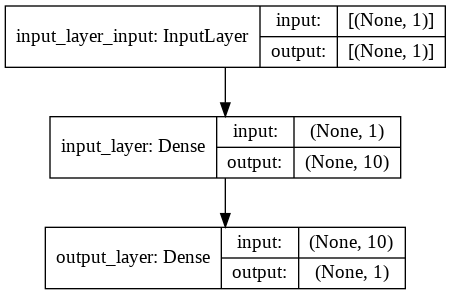

In [35]:
from tensorflow.keras.utils import plot_model

plot_model(model = model, show_shapes = True)

### Visualizing our models predictions

To visualize predictions, it is good to plot them against the ground truth labels.

Often you'll see this in the form of y_test vs. y_pred (ground truth vs. predictions).

First, we'll make some predictions on the test data (X_test), remember the model has never seen the test data.

In [36]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

array([[ 72.42797 ],
       [ 76.58641 ],
       [ 80.74485 ],
       [ 84.90329 ],
       [ 89.06173 ],
       [ 93.22018 ],
       [ 97.378624],
       [101.537056],
       [105.695496],
       [109.853935]], dtype=float32)

In [37]:
# Let's create a plotting function


def plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=y_pred,
    ):
    """
  Plots training data, test data and compares them

  """

    plt.figure(figsize=(10, 7))
    plt.style.use('ggplot')

  # Plot training data in blue

    plt.scatter(train_data, train_labels, c='b', label='Training data')

  # Plot training data in green

    plt.scatter(test_data, test_labels, c='g', label='Test data')

  # Plot models predictions in red

    plt.scatter(test_data, predictions, c='r', label='Predictions')

    plt.legend()

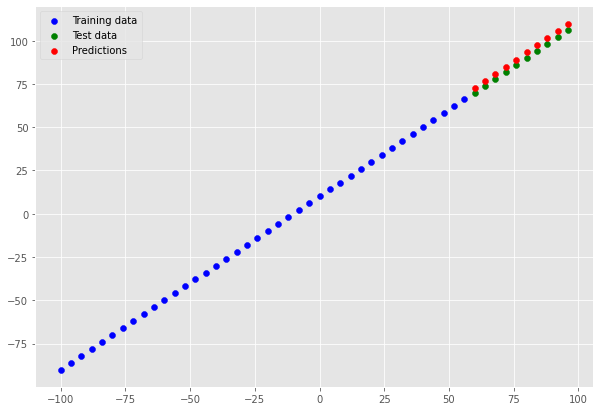

In [38]:
plot_predictions(train_data=X_train, train_labels=y_train,
                 test_data=X_test, test_labels=y_test,
                 predictions=y_pred);

### Evaluating our models prediction with regression evaluation metrics

Depending on problem you are working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics would be:

* MAE - Mean absolute error "On average, how wrong is each of my model's prediction errors"

* MSE - Mean square error, "Square the average errors"


In [39]:
#Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 115ms/step - loss: 3.1410 - mae: 3.1410


[3.1409544944763184, 3.1409544944763184]

In [40]:
#Calculate the mean absolute error using numpy
np.mean(np.subtract(y_pred,y_test))

3.1409538269042967

In [41]:
#Calculate the mean squared error
mse = tf.metrics.mse(y_true= y_test,
                     y_pred = tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=10.072696>

In [42]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true= y_true,
                                        y_pred = y_pred)
  
def mse(y_true,y_pred):
  return tf.metrics.mean_squared_error(y_true= y_true,
                                       y_pred = y_pred)

### Running expiriments to improve our model

After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.

Again, there are many different ways you can do this, but 3 of the main ones are:

Get more data - get more examples for your model to train on (more opportunities to learn patterns).

Make your model larger (use a more complex model) - this might come in the form of more layers or more hidden units in each layer.

Train for longer - give your model more of a chance to find the patterns in the data.

Since we created our dataset, we could easily make more data but this isn't always the case when you're working with real-world datasets.

So let's take a look at how we can improve our model using 2 and 3.

To do so, we'll build 3 models and compare their results:

model_1 - same as original model, 1 layer, trained for 100 epochs.

model_2 - 2 layers, trained for 100 epochs.

model_3 - 2 layers, trained for 500 epochs.

In [43]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [44]:
#Set random seed
tf.random.set_seed(42)

#Build a model
model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.Dense(1))

#Compile a model
model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate= 0.01),
                metrics = ['mae'])

#Fit the model
model_1.fit(X_train, y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 17.1341 - mae: 17.1341
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 16.3267 - mae: 16.3267
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 15.5698 - mae: 15.5698
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 14.8027 - mae: 14.8027
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 14.0456 - mae: 14.0456
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 13.3200 - mae: 13.3200
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 12.5875 - mae: 12.5875
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 11.8444 - mae: 11.8444
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 11.1684 - mae: 11.1684
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 10.5400 - mae: 10.5400
Epoch 11/100
2/2 [==============================] - 0s 5ms

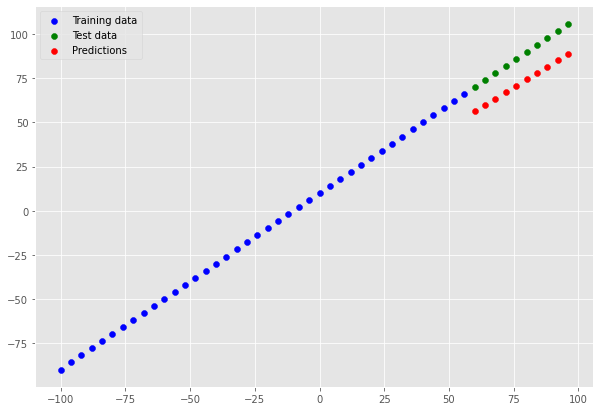

In [45]:
#Make and plot predictions
y_preds_1 = model_1.predict(X_test)

plot_predictions(train_data = X_train,
                 train_labels = y_train,
                 test_data = X_test,
                 test_labels = y_test,
                 predictions = y_preds_1)

In [46]:
#Calculate model_1 evaluation
mae_1 = mae(y_test, tf.squeeze(y_preds_1))
mse_1 = mse(y_test, tf.squeeze(y_preds_1))
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=15.4527645>,
 <tf.Tensor: shape=(), dtype=float32, numpy=239.99292>)

In [47]:
#Set random seed
tf.random.set_seed(42)

#Build a model
model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Dense(10, activation ='relu')),
model_2.add(tf.keras.layers.Dense(1, activation= 'relu')),

#Compile a model
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate= 0.01),
                metrics = ['mae'])

# Fit the model
model_2.fit(X_train, y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 42.9790 - mae: 42.9790
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 39.9109 - mae: 39.9109
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 36.9743 - mae: 36.9743
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 33.9349 - mae: 33.9349
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 31.0283 - mae: 31.0283
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 30.0460 - mae: 30.0460
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 29.1513 - mae: 29.1513
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 28.3830 - mae: 28.3830
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 28.3122 - mae: 28.3122
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 28.4625 - mae: 28.4625
Epoch 11/100
2/2 [==============================] - 0s 7ms/

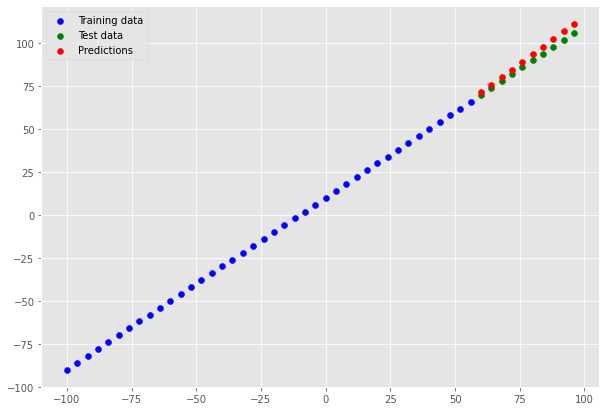

In [48]:
#Make and plot predictions
y_preds_2 = model_2.predict(X_test)

plot_predictions(train_data= X_train,
                 train_labels = y_train,
                 test_data = X_test,
                 test_labels = y_test,
                 predictions = y_preds_2)

In [49]:
# Calculate model_2 evaluation metrics 
mae_2 = mae(y_test, tf.squeeze(y_preds_2))
mse_2 = mse(y_test, tf.squeeze(y_preds_2))

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.4039192>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.329376>)

### ** Build Model 3 **

In [50]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential()
model_3.add(tf.keras.layers.Dense(10, activation = 'relu')),
model_3.add(tf.keras.layers.Dense(1, activation= 'relu'))

# 2. Compile the model

model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                metrics = ['mae'])

#3. Run the model

model_3.fit(X_train, y_train, epochs = 500)

Epoch 1/500
2/2 [==============================] - 0s 8ms/step - loss: 42.9790 - mae: 42.9790
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 39.9109 - mae: 39.9109
Epoch 3/500
2/2 [==============================] - 0s 6ms/step - loss: 36.9743 - mae: 36.9743
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 33.9349 - mae: 33.9349
Epoch 5/500
2/2 [==============================] - 0s 6ms/step - loss: 31.0283 - mae: 31.0283
Epoch 6/500
2/2 [==============================] - 0s 6ms/step - loss: 30.0460 - mae: 30.0460
Epoch 7/500
2/2 [==============================] - 0s 5ms/step - loss: 29.1513 - mae: 29.1513
Epoch 8/500
2/2 [==============================] - 0s 3ms/step - loss: 28.3830 - mae: 28.3830
Epoch 9/500
2/2 [==============================] - 0s 7ms/step - loss: 28.3122 - mae: 28.3122
Epoch 10/500
2/2 [==============================] - 0s 5ms/step - loss: 28.4625 - mae: 28.4625
Epoch 11/500
2/2 [==============================] - 0s 5ms/

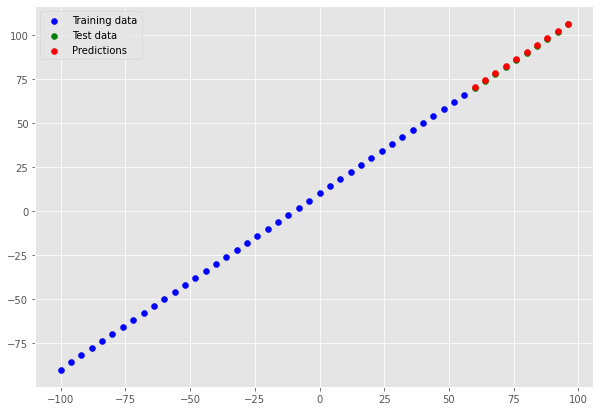

In [51]:
#Make and plot predictions
y_preds_3 = model_3.predict(X_test)

plot_predictions(train_data= X_train,
                 train_labels = y_train,
                 test_data = X_test,
                 test_labels = y_test,
                 predictions = y_preds_3)

In [52]:
# Calculate model_2 evaluation metrics 
mae_3 = mae(y_test, tf.squeeze(y_preds_3))
mse_3 = mse(y_test, tf.squeeze(y_preds_3))

mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=0.40908584>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.1709481>)

In [53]:
y_preds_3.shape

(10, 1)

** Note ** You want to start with small experiments (small models) and make sure they work and then increase their scale.

## Compare the results of our experiments

We have run a few experiments, we will wait for our results.

In [54]:
# Let us compare our models using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                ["model_2", mae_2.numpy(), mse_2.numpy()],
                ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns = ["model", "mae","mse"])

In [55]:
all_results

,model,mae,mse
0,model_1,15.452765,239.992920
1,model_2,3.403919,13.329376
2,model_3,0.409086,0.170948


In [56]:
#Model 3 is our best performing model
model_3.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


## One of our main goals is to minimize our time between model experiments.
The more experiments you would do, the more things you'll figure out which do not work and we get closer to figuting ut what works.

EXPERIMENT! EXPERIMENT! EXPERIMENT!**

## Tracking your experiments 

One really good habit in ML modelling is to track the results of your expiriments.

And when doin so, it can be tyedious if you are running a l;ot of experiments.

Luckily, there are tools to help us!

We've done a simple version of this above (keeping the results in different variables).

📖 Resource: But as you build more models, you'll want to look into using tools such as:

TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this later).

Weights & Biases - a tool for tracking all kinds of machine learning experiments (the good news for Weights & Biases is it plugs into TensorBoard).

## Saving our models

Once you've trained a model and found one which performs to your liking, you'll probably want to save it for use elsewhere (like a web application or mobile device).

You can save a TensorFlow/Keras model using model.save().

There are two ways to save a model in TensorFlow:

The SavedModel format (default).
The HDF5 format.
The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

Which one should you use?

It depends on your situation but the SavedModel format will suffice most of the time.

Both methods use the same method call.

In [57]:
# Save model
model_3.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [58]:
# Save model in HDF5 format
model_3.save("best_model_HDF5_format.h5")

#Loading in a saved model

In [59]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [60]:
model_3.summary() # It is the same model

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [61]:
# Compare model_3 predictions with SavedModel format model predictions
model_3_preds = model_3.predict(X_test)

loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)

model_3_preds == loaded_SavedModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [62]:
model_3_preds

array([[ 70.315125],
       [ 74.336006],
       [ 78.35688 ],
       [ 82.37776 ],
       [ 86.39865 ],
       [ 90.41953 ],
       [ 94.44041 ],
       [ 98.46128 ],
       [102.48217 ],
       [106.503044]], dtype=float32)

In [63]:
loaded_SavedModel_format_preds

array([[ 70.315125],
       [ 74.336006],
       [ 78.35688 ],
       [ 82.37776 ],
       [ 86.39865 ],
       [ 90.41953 ],
       [ 94.44041 ],
       [ 98.46128 ],
       [102.48217 ],
       [106.503044]], dtype=float32)

In [64]:
# Load in a model using the HDF5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [65]:
# Compare model_3 predictions with HDF5 format model predictions
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
loaded_h5_model_preds == model_3_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model ( or any other file) from Google Colab

If you want to download your files from Google Colab:

1. You can go to the "files" tab and right click download

2. Use code (see the cell below)

3. Save it to Google Drive and copying it there.

In [66]:
#Download a file from Google colab
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [67]:
#Save a file from Google Colab to Google Drive (mount Google Drive)
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/Tensorflow

In [68]:
!ls /content/drive/MyDrive/Tensorflow

best_model_HDF5_format.h5


##Let us tackle a larger dataset

In [69]:
# Import required libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
#Read the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [71]:
insurance.info() #Summarising the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


###One hot encoding to turn categorical variables into numerical variables

In [72]:
#One hot encoding
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [73]:
# Create X and y values (features and labels)
X = insurance_one_hot.drop(["charges"], axis = 1)
y = insurance_one_hot["charges"]

In [74]:
#Split the data into train and test sets
tf.random.set_seed(42)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [75]:
print(X_train.shape) 
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 11)
(268, 11)
(1070,)
(268,)


In [91]:
# Build a neural network (like the model_3 above)
tf.random.set_seed(42)

#1. Create a model
insurance_model = tf.keras.Sequential()
insurance_model.add(tf.keras.layers.Dense(10)),
insurance_model.add(tf.keras.layers.Dense(1))

#2. Compile the model
insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ['mae'])

#3. Fit the model
insurance_model.fit(X_train, y_train, epochs = 100, verbose = 0)

In [92]:
insurance_model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 10)                120       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


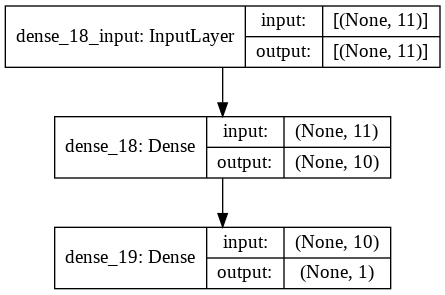

In [93]:
#Plotting our neural network
tf.keras.utils.plot_model(insurance_model, show_shapes= True)

In [94]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7099.3154 - mae: 7099.3154


[7099.3154296875, 7099.3154296875]

Right now it looks like our model isn't performing too well..let's try and improve it.

We'll try 3 things:

Increasing the number of layers (2 -> 3).
Increasing the number of units in each layer (except for the output layer).
Changing the optimizer (from SGD to Adam).
Everything else will stay the same.

In [122]:
# Build a better model

# Set random seed

tf.random.set_seed(42)

# Add an extra layer and extra units

insurance_model_2 = tf.keras.Sequential()
insurance_model_2.add(tf.keras.layers.Dense(100, activation='relu'))  # 100 units in the first layer
insurance_model_2.add(tf.keras.layers.Dense(10, activation='relu'))  # 10 units in the second layer
insurance_model_2.add(tf.keras.layers.Dense(1))  #Final unit

# Compile a model

insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                          metrics=['mae'])

# Fit a model

history = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 12845.0537 - mae: 12845.0537
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 9742.3623 - mae: 9742.3623
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7313.7627 - mae: 7313.7627
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7137.0615 - mae: 7137.0615
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7024.3398 - mae: 7024.3398
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 6909.8530 - mae: 6909.8530
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 6774.8521 - mae: 6774.8521
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 6614.6543 - mae: 6614.6543
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 6434.7036 - mae: 6434.7036
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 6282.8389 - mae: 6282.83

In [123]:
# Evaluate our larger model
insurance_model_2.evaluate(X_train,y_train)

34/34 [==============================] - 0s 1ms/step - loss: 2240.0447 - mae: 2240.0447


[2240.044677734375, 2240.044677734375]

In [124]:
#Let us see the performance boost with the second model.
print(insurance_model.evaluate(X_test,y_test))
print(insurance_model_2.evaluate(X_test,y_test))

9/9 [==============================] - 0s 2ms/step - loss: 6016.6240 - mae: 6016.6240
[6016.6240234375, 6016.6240234375]
9/9 [==============================] - 0s 2ms/step - loss: 2796.3152 - mae: 2796.3152
[2796.315185546875, 2796.315185546875]


## Let us run a third model and increase epochs

In [125]:
# Set random seed
tf.random.set_seed(42)

# Build our model

insurance_model_3 = tf.keras.Sequential()
insurance_model_3.add(tf.keras.layers.Dense(100, activation= 'relu')) # 100 units in the first layer
insurance_model_3.add(tf.keras.layers.Dense(10, activation='relu')) #10 units in the second layer
insurance_model_3.add(tf.keras.layers.Dense(1)) #Final output layer

# Compile a model

insurance_model_3.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ['mae'])

# Fit a model
insurance_model.fit(X_train, y_train, epochs = 200, verbose = 1)

Epoch 1/200
34/34 [==============================] - 0s 1ms/step - loss: 5507.1348 - mae: 5507.1348
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 4659.4937 - mae: 4659.4937
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 5221.5151 - mae: 5221.5151
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 5099.2891 - mae: 5099.2891
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 5181.3506 - mae: 5181.3506
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 4833.5889 - mae: 4833.5889
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 5423.9321 - mae: 5423.9321
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 4818.8198 - mae: 4818.8198
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 5171.7798 - mae: 5171.7798
Epoch 10/200
34/34 [==============================] - 0s 1ms/step - loss: 4882.8174 - mae: 4882.8174

In [126]:
# Check the results of the insurance model on the test data

insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 14207.0273 - mae: 14207.0273


[14207.02734375, 14207.02734375]

In [127]:
#Let us see the performance boost with the second model.
print(insurance_model.evaluate(X_test,y_test))
print(insurance_model_2.evaluate(X_test,y_test)) #The second model performed the best
print(insurance_model_3.evaluate(X_test,y_test))

9/9 [==============================] - 0s 2ms/step - loss: 5252.6494 - mae: 5252.6494
[5252.6494140625, 5252.6494140625]
9/9 [==============================] - 0s 2ms/step - loss: 2796.3152 - mae: 2796.3152
[2796.315185546875, 2796.315185546875]
9/9 [==============================] - 0s 2ms/step - loss: 14207.0273 - mae: 14207.0273
[14207.02734375, 14207.02734375]


Text(0.5, 0, 'Epochs')

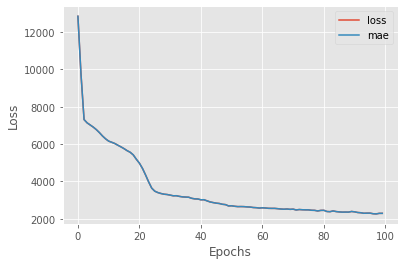

In [128]:
# Plot history (also known as loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel ("Loss")
plt.xlabel("Epochs")

From this, it looks like our model's loss (and MAE) were both still decreasing (in our case, MAE and loss are the same, hence the lines in the plot overlap eachother).

What this tells us is the loss might go down if we try training it for longer.

## 🤔 Question: How long should you train for?

It depends on what problem you're working on. Sometimes training won't take very long, other times it'll take longer than you expect. A common method is to set your model training for a very long time (e.g. 1000's of epochs) but set it up with an EarlyStopping callback so it stops automatically when it stops improving. We'll see this in another module.

Let's train the same model as above for a little longer. We can do this but calling fit on it again.

## Preprocessing Data (normalization and standardization)


Preprocessing data (normalization and standardization)
A common practice when working with neural networks is to make sure all of the data you pass to them is in the range 0 to 1.

This practice is called normalization (scaling all values from their original range to, e.g. between 0 and 100,000 to be between 0 and 1).

There is another process call standardization which converts all of your data to unit variance and 0 mean.

These two practices are often part of a preprocessing pipeline (a series of functions to prepare your data for use with neural networks).

Knowing this, some of the major steps you'll take to preprocess your data for a neural network include:

Turning all of your data to numbers (a neural network can't handle strings).
Making sure your data is in the right shape (verifying input and output shapes).
Feature scaling:
Normalizing data (making sure all values are between 0 and 1). This is done by subtracting the minimum value then dividing by the maximum value minus the minmum. This is also referred to as min-max scaling.
Standardization (making sure all values have a mean of 0 and a variance of 1). This is done by substracting the mean value from the target feature and then dividing it by the standard deviation.
Which one should you use?
With neural networks you'll tend to favour normalization as they tend to prefer values between 0 and 1 (you'll see this espcially with image processing), however, you'll often find a neural network can perform pretty well with minimal feature scaling.
📖 Resource: For more on preprocessing data, I'd recommend reading the following resources:

Scikit-Learn's documentation on preprocessing data.
Scale, Standardize or Normalize with Scikit-Learn by Jeff Hale.
We've already turned our data into numbers using get_dummies(), let's see how we'd normalize it as well.

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

#Read the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Now, just as before, we need to transform the non-numerical columns into numbers and this time we'll also be normalizing the numerical columns with different ranges (to make sure they're all between 0 and 1).

To do this, we're going to use a few classes from Scikit-Learn:

make_column_transformer - build a multi-step data preprocessing function for the folllowing trnasformations:
MinMaxScaler - make sure all numerical columns are normalized (between 0 and 1).
OneHotEncoder - one hot encode the non-numerical columns

In [138]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

# Create a column transformer

ct = make_column_transformer((MinMaxScaler(), ['age', 'bmi', 'children'
                             ]), (OneHotEncoder(handle_unknown='ignore'
                             ), ['sex', 'smoker', 'region']))

# Create X and y

X = insurance.drop('charges', axis=1)
y = insurance['charges']

# Build our train and test sets

(X_train, X_test, y_train, y_test) = train_test_split(X, y,
        test_size=0.2, random_state=42)

# Fit the column transformer to our training data

ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and (OneHotEncoder)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [140]:
# What does our data look like now?
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [141]:
# Notice the normalized/one-hot encoded shape is larger because of the extra columns
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

Our data is normalized and numerical, let's model it.

We'll use the same model as insurance_model_2.

In [143]:
# Set random seed

tf.random.set_seed(42)

# 1. Build a model

insurance_model_4 = tf.keras.Sequential()
insurance_model_4.add(tf.keras.layers.Dense(100, activation='relu'))
insurance_model_4.add(tf.keras.layers.Dense(10, activation='relu'))
insurance_model_4.add(tf.keras.layers.Dense(1))

# 2. Compile a model

insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                          metrics=['mae'])

# 3. Build a model

insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13329.9062 - mae: 13329.9062
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 12997.3760 - mae: 12997.3760
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 11294.1982 - mae: 11294.1982
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 8596.6260 - mae: 8596.6260
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7823.9551 - mae: 7823.9551
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7563.9800 - mae: 7563.9800
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7272.8896 - mae: 7272.8896
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 6946.5977 - mae: 6946.5977
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 6544.5186 - mae: 6544.5186
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 6019.6108 - mae: 601

In [145]:
# Evaulate 3rd model
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 2726.3518 - mae: 2726.3518


[2726.351806640625, 2726.351806640625]

In [147]:
# Compare modelling results from non-normalized data and normalized data
insurance_model_2.evaluate(X_test_normal, y_test), insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 2726.3518 - mae: 2726.3518


([12017.25, 12017.25], [2726.351806640625, 2726.351806640625])

This is one of the main benefits of normalization: faster convergence time (a fancy way of saying, your model gets to better results faster).

insurance_model_2 may have eventually achieved the same results as insurance_model_3 if we left it training for longer.

Also, the results may change if we were to alter the architectures of the models, e.g. more hidden units per layer or more layers.

But since our main goal as neural network practioners is to decrease the time between experiments, anything that helps us get better results sooner is a plus.